In [1]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

model_vgg_35 = load_model('drowsiness_vgg_non_gpu_35.h5')
model_vgg_50 = load_model('drowsiness_vgg_non_gpu_50.h5')
model_vgg_100 = load_model('drowsiness_vgg_non_gpu_100.h5')

model_lenet_35 = load_model('drowsiness_le_non_gpu_35.h5')
model_lenet_50 = load_model('drowsiness_le_non_gpu_50.h5')
model_lenet_100 = load_model('drowsiness_le_non_gpu_100.h5')

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def wajah_paldi(direc="./pengujian_citra/paldi"):
    labels = ['wajah_tidak_menguap', 'wajah_menguap']
    IMG_SIZE = 48
    data = []
    for label in labels:
        path = os.path.join(direc, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2GRAY)
            resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([resized_array, class_num])
    return data

In [3]:
def wajah_zul(direc="./pengujian_citra/zul"):
    labels = ['wajah_tidak_menguap', 'wajah_menguap']
    IMG_SIZE = 48
    data = []
    for label in labels:
        path = os.path.join(direc, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2GRAY)
            resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([resized_array, class_num])
    return data

In [4]:
def kedua_mata_paldi(direc="./pengujian_citra/paldi"):
    labels = ['mata_tertutup', 'mata_terbuka']
    IMG_SIZE = 48
    data = []
    for label in labels:
        path = os.path.join(direc, label)
        class_num = labels.index(label)
        class_num +=2
        print(path)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2GRAY)
            resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([resized_array, class_num])
    return data

In [5]:
def kedua_mata_zul(direc="./pengujian_citra/zul"):
    labels = ['mata_tertutup', 'mata_terbuka']
    IMG_SIZE = 48
    data = []
    for label in labels:
        path = os.path.join(direc, label)
        class_num = labels.index(label)
        class_num +=2
        print(path)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2GRAY)
            resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([resized_array, class_num])
    return data

In [6]:
def data_paldi():
    data_wajah_paldi = wajah_paldi()
    data_kedua_mata_paldi = kedua_mata_paldi()
    data_wajah_paldi.extend(data_kedua_mata_paldi)
    return np.array(data_wajah_paldi, dtype=object)

In [7]:
def data_zul():
    data_wajah_zul = wajah_zul()
    data_kedua_mata_zul = kedua_mata_zul()
    data_wajah_zul.extend(data_kedua_mata_zul)
    return np.array(data_wajah_zul, dtype=object)

In [8]:
data_paldi_new = data_paldi()
data_zul_new = data_zul()

./pengujian_citra/paldi\mata_tertutup
./pengujian_citra/paldi\mata_terbuka
./pengujian_citra/zul\mata_tertutup
./pengujian_citra/zul\mata_terbuka


In [9]:
x_paldi = []
y_paldi = []
for feature, label in data_paldi_new:
    x_paldi.append(feature)
    y_paldi.append(label)

In [10]:
x_zul = []
y_zul = []
for feature, label in data_zul_new:
    x_zul.append(feature)
    y_zul.append(label)

In [11]:
x_paldi = np.array(x_paldi)
x_zul = np.array(x_zul)

In [12]:
def confusion_matrix_for(cls, cm):
    TP = cm[cls, cls]
    FN = cm[cls].sum() - TP
    FP = cm[:, cls].sum() - TP
    TN = cm.sum() - TP - FN - FP
    return np.array([TP, FN, FP, TN])

def confusion_matrix_score(tp, fn, fp, tn):
    akurasi = ((tp + tn) / (tp + fp + fn + tn)) * 100
    presisi = (tp / (tp + fp)) * 100
    recall = (tp / (tp + fn)) * 100
    return akurasi, presisi, recall

In [13]:
from sklearn.metrics import confusion_matrix

y_pred_vgg35 = np.argmax(model_vgg_35.predict(x_paldi), axis=1)
cm_vgg35 = confusion_matrix(y_paldi, y_pred_vgg35)
print(cm_vgg35)

4/4 [==============================] - 0s 29ms/step
[[11  2 17  0]
 [ 0 28  0  2]
 [ 0  0 28  2]
 [ 0  0  0 30]]


In [14]:
lst_vgg35 = []
akurasi_vgg35 = []
presisi_vgg35 = []
recall_vgg35 = []
mean_acc_vgg35 = 0
mean_pres_vgg35 = 0
mean_recal_vgg35 = 0

for cls in range(cm_vgg35.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, cm_vgg35)
    lst_vgg35.append([TP, FN, FP, TN])
    
for i in range(len(lst_vgg35)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_vgg35[i][0], lst_vgg35[i][1], lst_vgg35[i][2], lst_vgg35[i][3])
    akurasi_vgg35.append(akurasi)
    presisi_vgg35.append(presisi)
    recall_vgg35.append(recall)
    mean_acc_vgg35 += akurasi
    mean_pres_vgg35 += presisi
    mean_recal_vgg35 += recall
    print(f'Akurasi: {akurasi:.4f}, Presisi: {presisi:.4f}, Recall: {recall:.4f}')
    print()
print(f'Akurasi rata-rata: {mean_acc_vgg35 / 4:.2f}\nPresisi rata-rata: {mean_pres_vgg35 / 4:.2f} \nSensitivitas Rata-rata: {mean_recal_vgg35 / 4:.2f}')

Hasil dari setiap class 0
Akurasi: 84.1667, Presisi: 100.0000, Recall: 36.6667

Hasil dari setiap class 1
Akurasi: 96.6667, Presisi: 93.3333, Recall: 93.3333

Hasil dari setiap class 2
Akurasi: 84.1667, Presisi: 62.2222, Recall: 93.3333

Hasil dari setiap class 3
Akurasi: 96.6667, Presisi: 88.2353, Recall: 100.0000

Akurasi rata-rata: 90.42
Presisi rata-rata: 85.95 
Sensitivitas Rata-rata: 80.83


In [15]:
y_pred_vgg50 = np.argmax(model_vgg_50.predict(x_paldi), axis=1)
cm_vgg50 = confusion_matrix(y_paldi, y_pred_vgg50)

4/4 [==============================] - 0s 30ms/step


In [16]:
lst_vgg50 = []
akurasi_vgg50 = []
presisi_vgg50 = []
recall_vgg50 = []
mean_acc_vgg50 = 0
mean_pres_vgg50 = 0
mean_recal_vgg50 = 0

for cls in range(cm_vgg50.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, cm_vgg50)
    lst_vgg50.append([TP, FN, FP, TN])
    
for i in range(len(lst_vgg50)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_vgg50[i][0], lst_vgg50[i][1], lst_vgg50[i][2], lst_vgg50[i][3])
    akurasi_vgg50.append(akurasi)
    presisi_vgg50.append(presisi)
    recall_vgg50.append(recall)
    mean_acc_vgg50 += akurasi
    mean_pres_vgg50 += presisi
    mean_recal_vgg50 += recall
    print(f'Akurasi: {akurasi:.4f}, Presisi: {presisi:.4f}, Recall: {recall:.4f}')
    print()
print(f'Akurasi rata-rata: {mean_acc_vgg50 / 4:.2f}\nPresisi rata-rata: {mean_pres_vgg50 / 4:.2f} \nSensitivitas Rata-rata: {mean_recal_vgg50 / 4:.2f}')

Hasil dari setiap class 0
Akurasi: 95.0000, Presisi: 100.0000, Recall: 80.0000

Hasil dari setiap class 1
Akurasi: 95.0000, Presisi: 83.3333, Recall: 100.0000

Hasil dari setiap class 2
Akurasi: 98.3333, Presisi: 100.0000, Recall: 93.3333

Hasil dari setiap class 3
Akurasi: 98.3333, Presisi: 93.7500, Recall: 100.0000

Akurasi rata-rata: 96.67
Presisi rata-rata: 94.27 
Sensitivitas Rata-rata: 93.33


In [17]:
y_pred_vgg100 = np.argmax(model_vgg_100.predict(x_paldi), axis=1)
cm_vgg100 = confusion_matrix(y_paldi, y_pred_vgg100)

4/4 [==============================] - 0s 33ms/step


In [18]:
lst_vgg100 = []
akurasi_vgg100 = []
presisi_vgg100 = []
recall_vgg100 = []
mean_acc_vgg100 = 0
mean_pres_vgg100 = 0
mean_recal_vgg100 = 0

for cls in range(cm_vgg100.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, cm_vgg100)
    lst_vgg100.append([TP, FN, FP, TN])
    
for i in range(len(lst_vgg100)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_vgg100[i][0], lst_vgg100[i][1], lst_vgg100[i][2], lst_vgg100[i][3])
    akurasi_vgg100.append(akurasi)
    presisi_vgg100.append(presisi)
    recall_vgg100.append(recall)
    mean_acc_vgg100 += akurasi
    mean_pres_vgg100 += presisi
    mean_recal_vgg100 += recall
    print(f'Akurasi: {akurasi:.4f}, Presisi: {presisi:.4f}, Recall: {recall:.4f}')
    print()

print(f'Akurasi rata-rata: {mean_acc_vgg100 / 4:.2f}\nPresisi rata-rata: {mean_pres_vgg100 / 4:.2f} \nSensitivitas Rata-rata: {mean_recal_vgg100 / 4:.2f}')

Hasil dari setiap class 0
Akurasi: 80.0000, Presisi: 100.0000, Recall: 20.0000

Hasil dari setiap class 1
Akurasi: 82.5000, Presisi: 66.6667, Recall: 60.0000

Hasil dari setiap class 2
Akurasi: 74.1667, Presisi: 49.1525, Recall: 96.6667

Hasil dari setiap class 3
Akurasi: 96.6667, Presisi: 96.4286, Recall: 90.0000

Akurasi rata-rata: 83.33
Presisi rata-rata: 78.06 
Sensitivitas Rata-rata: 66.67


In [19]:
y_pred_le35 = np.argmax(model_lenet_35.predict(x_paldi), axis=1)
cm_le35 = confusion_matrix(y_paldi, y_pred_le35)
print(cm_le35)

4/4 [==============================] - 0s 7ms/step
[[30  0  0  0]
 [30  0  0  0]
 [30  0  0  0]
 [30  0  0  0]]


In [20]:
lst_le35 = []
akurasi_le35 = []
presisi_le35 = []
recall_le35 = []
mean_acc_lenet35 = 0
mean_pres_lenet35 = 0
mean_recal_lenet35 = 0

for cls in range(cm_le35.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, cm_le35)
    lst_le35.append([TP, FN, FP, TN])
    
for i in range(len(lst_le35)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_le35[i][0], lst_le35[i][1], lst_le35[i][2], lst_le35[i][3])
    akurasi_le35.append(akurasi)
    presisi_le35.append(np.nan_to_num(presisi, nan=0))
    recall_le35.append(recall)
    mean_acc_lenet35 += akurasi
    mean_pres_lenet35 += np.nan_to_num(presisi, nan=0)
    mean_recal_lenet35 += recall
    print(f'Akurasi: {akurasi:.4f}, Presisi: {np.nan_to_num(presisi, nan=0)}, Recall: {recall:.4f}')
    print()

print(f'Akurasi rata-rata: {mean_acc_lenet35 / 4:.2f}\nPresisi rata-rata: {np.nan_to_num(mean_pres_lenet35, nan=0) / 4:.2f} \nSensitivitas Rata-rata: {mean_recal_lenet35 / 4:.2f}')

Hasil dari setiap class 0
Akurasi: 25.0000, Presisi: 25.0, Recall: 100.0000

Hasil dari setiap class 1
Akurasi: 75.0000, Presisi: 0.0, Recall: 0.0000

Hasil dari setiap class 2
Akurasi: 75.0000, Presisi: 0.0, Recall: 0.0000

Hasil dari setiap class 3
Akurasi: 75.0000, Presisi: 0.0, Recall: 0.0000

Akurasi rata-rata: 62.50
Presisi rata-rata: 6.25 
Sensitivitas Rata-rata: 25.00


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5996\1973492805.py:10: RuntimeWarning: invalid value encountered in scalar divide
  presisi = (tp / (tp + fp)) * 100


In [21]:
y_pred_le50 = np.argmax(model_lenet_50.predict(x_paldi), axis=1)
cm_le50 = confusion_matrix(y_paldi, y_pred_le50)

4/4 [==============================] - 0s 6ms/step


In [29]:
lst_le50 = []
akurasi_le50 = []
presisi_le50 = []
recall_le50 = []
mean_acc_lenet50 = 0
mean_pres_lenet50 = 0
mean_recal_lenet50 = 0

for cls in range(cm_le50.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, cm_le50)
    lst_le50.append([TP, FN, FP, TN])
    
for i in range(len(lst_le50)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_le50[i][0], lst_le50[i][1], lst_le50[i][2], lst_le50[i][3])
    akurasi_le50.append(akurasi)
    presisi_le50.append(np.nan_to_num(presisi, nan=0))
    recall_le50.append(recall)
    mean_acc_lenet50 += akurasi
    mean_pres_lenet50 += np.nan_to_num(presisi, nan=0)
    mean_recal_lenet50 += recall
    print(f'Akurasi: {akurasi:.4f}, Presisi: {np.nan_to_num(presisi, nan=0):.4f}, Recall: {recall:.4f}')
    print()
print(f'Akurasi rata-rata: {mean_acc_lenet50 / 4:.2f}\nPresisi rata-rata: {np.nan_to_num(mean_pres_lenet50, nan=0) / 4:.2f} \nSensitivitas Rata-rata: {mean_recal_lenet50 / 4:.2f}')

Hasil dari setiap class 0
Akurasi: 75.0000, Presisi: 0.0000, Recall: 0.0000

Hasil dari setiap class 1
Akurasi: 75.0000, Presisi: 0.0000, Recall: 0.0000

Hasil dari setiap class 2
Akurasi: 68.3333, Presisi: 35.7143, Recall: 33.3333

Hasil dari setiap class 3
Akurasi: 28.3333, Presisi: 19.5652, Recall: 60.0000

Akurasi rata-rata: 61.67
Presisi rata-rata: 13.82 
Sensitivitas Rata-rata: 23.33


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5996\1973492805.py:10: RuntimeWarning: invalid value encountered in scalar divide
  presisi = (tp / (tp + fp)) * 100


In [30]:
y_pred_le100 = np.argmax(model_lenet_100.predict(x_paldi), axis=1)
cm_le100 = confusion_matrix(y_paldi, y_pred_le100)

4/4 [==============================] - 0s 6ms/step


In [31]:
lst_le100 = []
akurasi_le100 = []
presisi_le100 = []
recall_le100 = []
mean_acc_lenet100 = 0
mean_pres_lenet100 = 0
mean_recal_lenet100 = 0

for cls in range(cm_le100.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, cm_le100)
    lst_le100.append([TP, FN, FP, TN])
    
for i in range(len(lst_le100)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_le100[i][0], lst_le100[i][1], lst_le100[i][2], lst_le100[i][3])
    akurasi_le100.append(akurasi)
    presisi_le100.append(np.nan_to_num(presisi, nan=0))
    recall_le100.append(recall)
    mean_acc_lenet100 += akurasi
    mean_pres_lenet100 += np.nan_to_num(presisi, nan=0)
    mean_recal_lenet100 += recall
    print(f'Akurasi: {akurasi:.4f}, Presisi: {np.nan_to_num(presisi, nan=0):.4f}, Recall: {recall:.4f}')
    print()
print(f'Akurasi rata-rata: {mean_acc_lenet100 / 4:.2f}\nPresisi rata-rata: {np.nan_to_num(mean_pres_lenet100, nan=0) / 4:.2f} \nSensitivitas Rata-rata: {mean_recal_lenet100 / 4:.2f}')

Hasil dari setiap class 0
Akurasi: 27.5000, Presisi: 25.6410, Recall: 100.0000

Hasil dari setiap class 1
Akurasi: 75.0000, Presisi: 0.0000, Recall: 0.0000

Hasil dari setiap class 2
Akurasi: 75.0000, Presisi: 0.0000, Recall: 0.0000

Hasil dari setiap class 3
Akurasi: 77.5000, Presisi: 100.0000, Recall: 10.0000

Akurasi rata-rata: 63.75
Presisi rata-rata: 31.41 
Sensitivitas Rata-rata: 27.50


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5996\1973492805.py:10: RuntimeWarning: invalid value encountered in scalar divide
  presisi = (tp / (tp + fp)) * 100


In [32]:
from keras_flops import get_flops
# Setelah model diload
flops_vgg50 = get_flops(model_vgg_50, batch_size=1)
print("Jumlah FLOPS VGG 50:", flops_vgg50)


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.
Jumlah FLOPS VGG 50: 238590232


In [33]:
flops_lenet35 = get_flops(model_lenet_35, batch_size=1)
flops_lenet50 = get_flops(model_lenet_50, batch_size=1)
flops_lenet100 = get_flops(model_lenet_100, batch_size=1)
print("Jumlah FLOPS LeNet 35:", flops_lenet35)
print("Jumlah FLOPS LeNet 50:", flops_lenet50)
print("Jumlah FLOPS LeNet 100:", flops_lenet100)


Jumlah FLOPS LeNet 35: 8220908
Jumlah FLOPS LeNet 50: 8220908
Jumlah FLOPS LeNet 100: 8220908


In [35]:
y_pred_zul_vgg50 = np.argmax(model_vgg_50.predict(x_zul), axis=1)
cm_vgg50_zul = confusion_matrix(y_zul, y_pred_zul_vgg50)

y_pred_zul_le100 = np.argmax(model_lenet_100.predict(x_zul), axis=1)
cm_le100_zul = confusion_matrix(y_zul, y_pred_zul_le100)

4/4 [==============================] - 0s 7ms/step


In [36]:
print(cm_vgg50_zul)

[[ 5 25  0  0]
 [ 1 29  0  0]
 [ 0  0 30  0]
 [ 0  0  0 30]]


In [37]:
lst_vgg50zul = []
akurasi_vgg50zul = []
presisi_vgg50zul = []
recall_vgg50zul = []
mean_acc_vgg50zul = 0
mean_pres_vgg50zul = 0
mean_recal_vgg50zul = 0

for cls in range(cm_le100.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, cm_vgg50_zul)
    lst_vgg50zul.append([TP, FN, FP, TN])
    
for i in range(len(lst_vgg50zul)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_vgg50zul[i][0], lst_vgg50zul[i][1], lst_vgg50zul[i][2], lst_vgg50zul[i][3])
    akurasi_vgg50zul.append(akurasi)
    presisi_vgg50zul.append(np.nan_to_num(presisi, nan=0))
    recall_vgg50zul.append(recall)
    mean_acc_vgg50zul += akurasi
    mean_pres_vgg50zul += np.nan_to_num(presisi, nan=0)
    mean_recal_vgg50zul += recall
    print(f'Akurasi: {akurasi:.4f}, Presisi: {np.nan_to_num(presisi, nan=0):.4f}, Recall: {recall:.4f}')
    print()

Hasil dari setiap class 0
Akurasi: 78.3333, Presisi: 83.3333, Recall: 16.6667

Hasil dari setiap class 1
Akurasi: 78.3333, Presisi: 53.7037, Recall: 96.6667

Hasil dari setiap class 2
Akurasi: 100.0000, Presisi: 100.0000, Recall: 100.0000

Hasil dari setiap class 3
Akurasi: 100.0000, Presisi: 100.0000, Recall: 100.0000



In [39]:
lst_zulle100 = []
akurasi_zulle100 = []
presisi_zulle100 = []
recall_zulle100 = []
mean_acc_zullenet100 = 0
mean_pres_zullenet100 = 0
mean_recal_zullenet100 = 0

for cls in range(cm_le100_zul.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, cm_le100_zul)
    lst_zulle100.append([TP, FN, FP, TN])
    
for i in range(len(lst_zulle100)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_zulle100[i][0], lst_zulle100[i][1], lst_zulle100[i][2], lst_zulle100[i][3])
    akurasi_zulle100.append(akurasi)
    presisi_zulle100.append(np.nan_to_num(presisi, nan=0))
    recall_zulle100.append(recall)
    mean_pres_zullenet100 += akurasi
    mean_pres_lenet100 += np.nan_to_num(presisi, nan=0)
    mean_recal_zullenet100 += recall
    print(f'Akurasi: {akurasi:.4f}, Presisi: {np.nan_to_num(presisi, nan=0):.4f}, Recall: {recall:.4f}')
    print()

Hasil dari setiap class 0
Akurasi: 36.6667, Presisi: 28.3019, Recall: 100.0000

Hasil dari setiap class 1
Akurasi: 75.0000, Presisi: 0.0000, Recall: 0.0000

Hasil dari setiap class 2
Akurasi: 75.0000, Presisi: 0.0000, Recall: 0.0000

Hasil dari setiap class 3
Akurasi: 86.6667, Presisi: 100.0000, Recall: 46.6667



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5996\1973492805.py:10: RuntimeWarning: invalid value encountered in scalar divide
  presisi = (tp / (tp + fp)) * 100


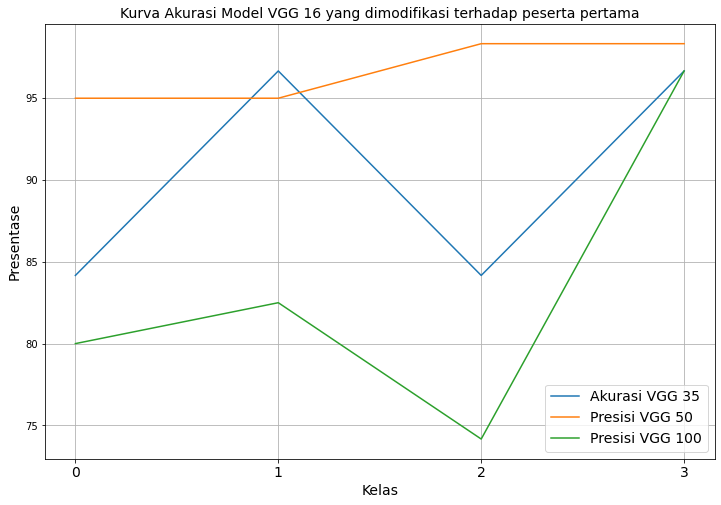

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(np.arange(4), akurasi_vgg35, label='Akurasi VGG 35')
plt.plot(np.arange(4), akurasi_vgg50, label="Presisi VGG 50")
plt.plot(np.arange(4), akurasi_vgg100, label="Presisi VGG 100")
plt.xticks(np.arange(4), fontsize=14)
plt.xlabel('Kelas', fontsize=14)
plt.ylabel('Presentase', fontsize=14)
plt.title('Kurva Akurasi Model VGG 16 yang dimodifikasi terhadap peserta pertama', fontsize=14)
plt.legend(prop={'size': 14}, loc='lower right')
plt.grid(True)
plt.show()

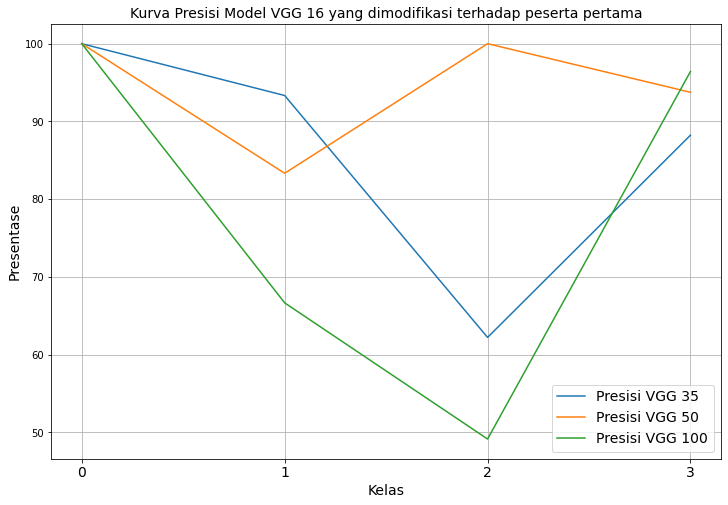

In [41]:
# Membuat kurva presisi
plt.figure(figsize=(12,8))
plt.plot(np.arange(4), presisi_vgg35, label='Presisi VGG 35')
plt.plot(np.arange(4), presisi_vgg50, label="Presisi VGG 50")
plt.plot(np.arange(4), presisi_vgg100, label="Presisi VGG 100")
plt.xticks(np.arange(4), fontsize=14)
plt.xlabel('Kelas', fontsize=14)
plt.ylabel('Presentase', fontsize=14)
plt.title('Kurva Presisi Model VGG 16 yang dimodifikasi terhadap peserta pertama', fontsize=14)
plt.legend(prop={'size': 14}, loc='lower right')
plt.grid(True)
plt.show()


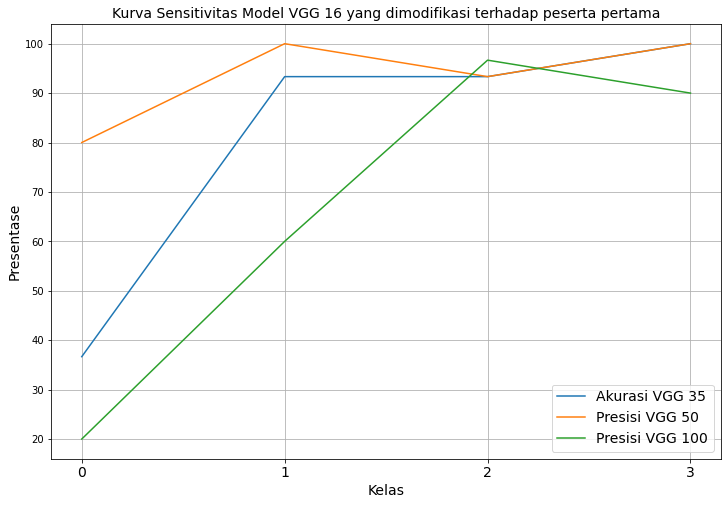

In [42]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(4), recall_vgg35, label='Akurasi VGG 35')
plt.plot(np.arange(4), recall_vgg50, label="Presisi VGG 50")
plt.plot(np.arange(4), recall_vgg100, label="Presisi VGG 100")
plt.xticks(np.arange(4), fontsize=14)
plt.xlabel('Kelas', fontsize=14)
plt.ylabel('Presentase', fontsize=14)
plt.title('Kurva Sensitivitas Model VGG 16 yang dimodifikasi terhadap peserta pertama', fontsize=14)
plt.legend(prop={'size': 14}, loc='lower right')
plt.grid(True)
plt.show()

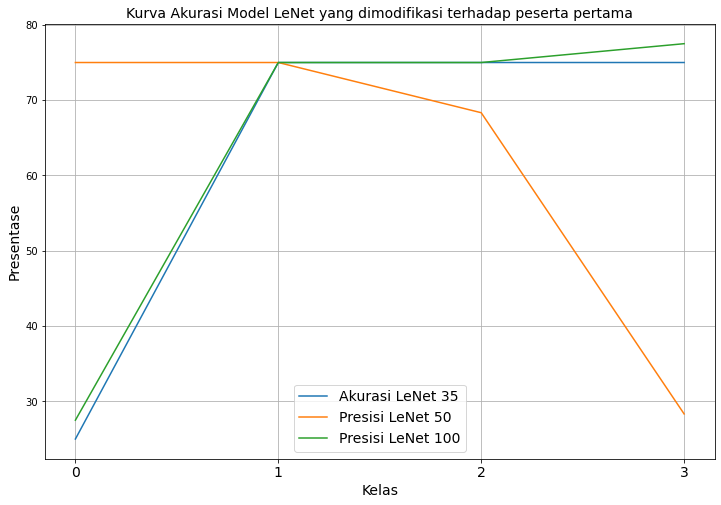

In [43]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(4), akurasi_le35, label='Akurasi LeNet 35')
plt.plot(np.arange(4), akurasi_le50, label="Presisi LeNet 50")
plt.plot(np.arange(4), akurasi_le100, label="Presisi LeNet 100")
plt.xticks(np.arange(4), fontsize=14)
plt.xlabel('Kelas', fontsize=14)
plt.ylabel('Presentase', fontsize=14)
plt.title('Kurva Akurasi Model LeNet yang dimodifikasi terhadap peserta pertama', fontsize=14)
plt.legend(prop={'size': 14}, loc='lower center')
plt.grid(True)
plt.show()

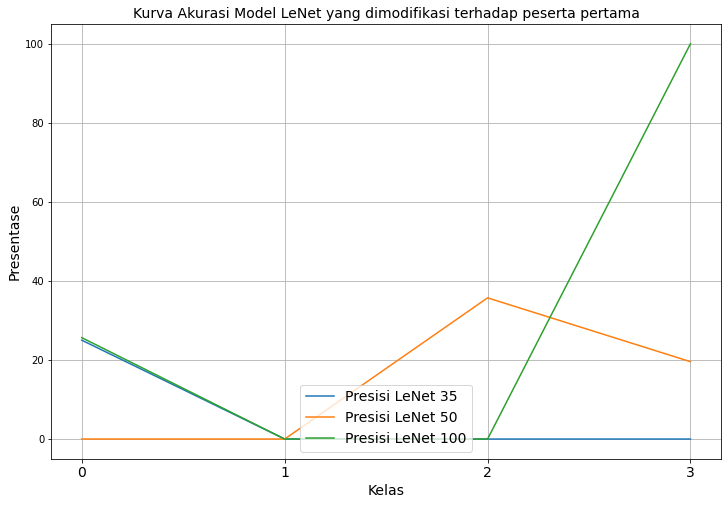

In [44]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(4), presisi_le35, label='Presisi LeNet 35')
plt.plot(np.arange(4), presisi_le50, label="Presisi LeNet 50")
plt.plot(np.arange(4), presisi_le100, label="Presisi LeNet 100")
plt.xticks(np.arange(4), fontsize=14)
plt.xlabel('Kelas', fontsize=14)
plt.ylabel('Presentase', fontsize=14)
plt.title('Kurva Akurasi Model LeNet yang dimodifikasi terhadap peserta pertama', fontsize=14)
plt.legend(prop={'size': 14}, loc='lower center')
plt.grid(True)
plt.show()

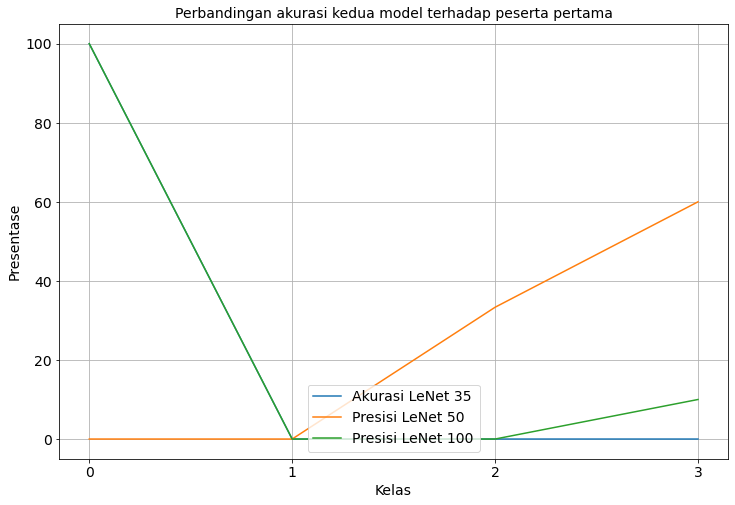

In [45]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(4), recall_le35, label='Akurasi LeNet 35')
plt.plot(np.arange(4), recall_le50, label="Presisi LeNet 50")
plt.plot(np.arange(4), recall_le100, label="Presisi LeNet 100")
plt.xticks(np.arange(4), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Kelas', fontsize=14)
plt.ylabel('Presentase', fontsize=14)
plt.title('Perbandingan akurasi kedua model terhadap peserta pertama', fontsize=14)
plt.legend(prop={'size': 14}, loc='lower center')
plt.grid(True)
plt.show()

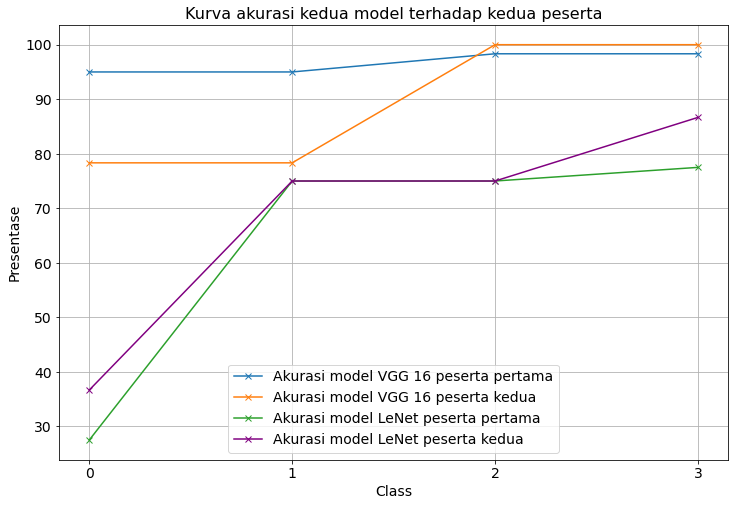

In [46]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(4), akurasi_vgg50, label='Akurasi model VGG 16 peserta pertama', linestyle='-', marker='x')
plt.plot(np.arange(4), akurasi_vgg50zul, label='Akurasi model VGG 16 peserta kedua', linestyle='-', marker='x')
plt.plot(np.arange(4), akurasi_le100, label="Akurasi model LeNet peserta pertama", linestyle='-', marker='x')
plt.plot(np.arange(4), akurasi_zulle100, label="Akurasi model LeNet peserta kedua",color='purple', linestyle='-', marker='x')
plt.xticks(np.arange(4), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Presentase', fontsize=14)
plt.title('Kurva akurasi kedua model terhadap kedua peserta', fontsize=16)
plt.legend(prop={'size': 14}, loc='lower center')
plt.grid(True)
plt.show()

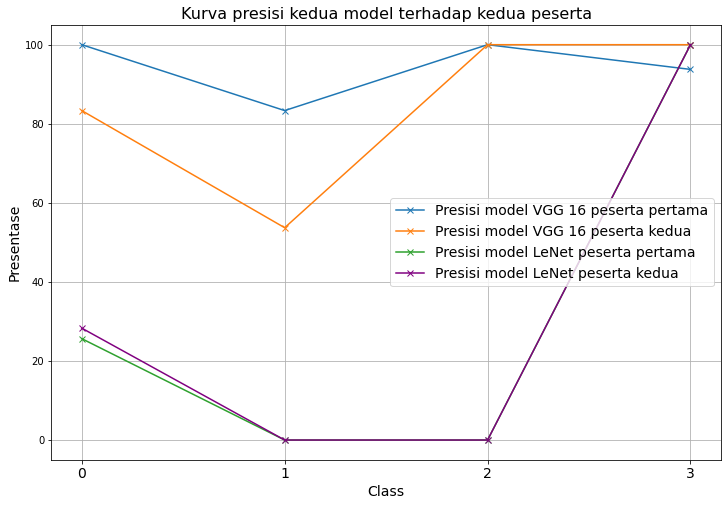

In [47]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(4), presisi_vgg50, label='Presisi model VGG 16 peserta pertama', linestyle='-', marker='x')
plt.plot(np.arange(4), presisi_vgg50zul, label='Presisi model VGG 16 peserta kedua', linestyle='-', marker='x')
plt.plot(np.arange(4), presisi_le100, label="Presisi model LeNet peserta pertama", linestyle='-', marker='x')
plt.plot(np.arange(4), presisi_zulle100, label="Presisi model LeNet peserta kedua", color='purple', linestyle='-', marker='x')
plt.xticks(np.arange(4), fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Presentase', fontsize=14)
plt.title('Kurva presisi kedua model terhadap kedua peserta', fontsize=16)
plt.legend(prop={'size': 14}, loc='best')
plt.grid(True)
plt.show()

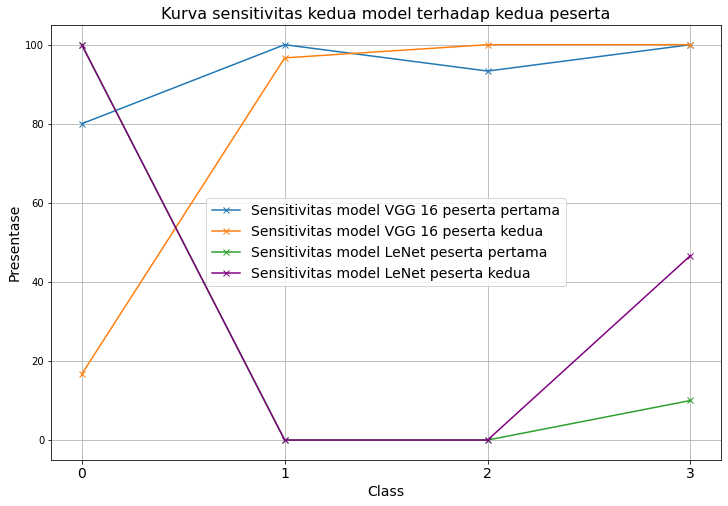

In [48]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(4), recall_vgg50, label='Sensitivitas model VGG 16 peserta pertama', linestyle='-', marker='x')
plt.plot(np.arange(4), recall_vgg50zul, label="Sensitivitas model VGG 16 peserta kedua", linestyle='-', marker='x')
plt.plot(np.arange(4), recall_le100, label="Sensitivitas model LeNet peserta pertama", linestyle='-', marker='x')
plt.plot(np.arange(4), recall_zulle100, label="Sensitivitas model LeNet peserta kedua", color='purple', linestyle='-', marker='x')
plt.xticks(np.arange(4), fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Presentase', fontsize=14)
plt.title('Kurva sensitivitas kedua model terhadap kedua peserta', fontsize=16)
plt.legend(prop={'size': 14}, loc='best')
plt.grid(True)
plt.show()

In [51]:
import tensorflow as tf
from keras_flops import get_flops

interpreter = tf.lite.Interpreter(model_path='model_new1.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

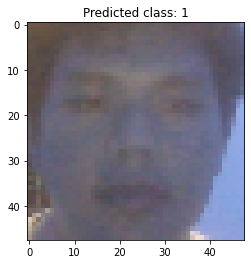

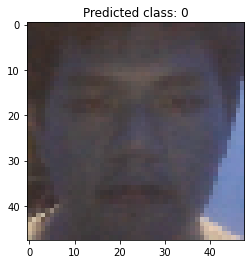

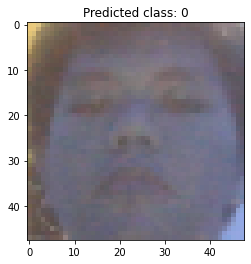

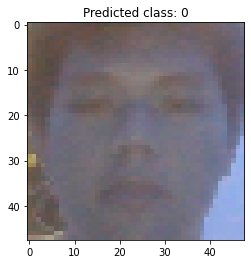

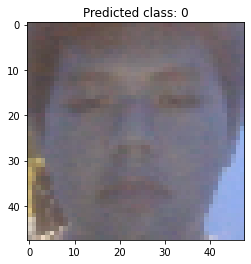

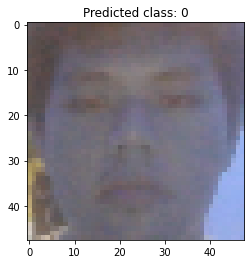

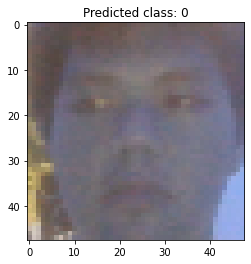

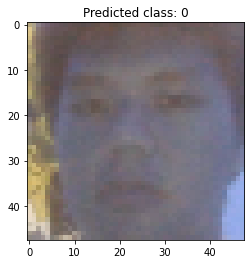

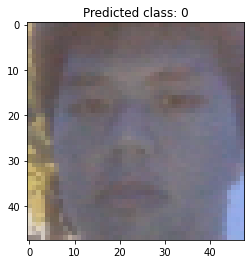

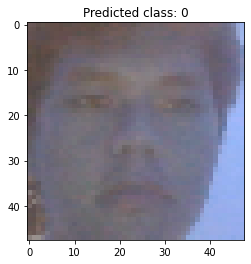

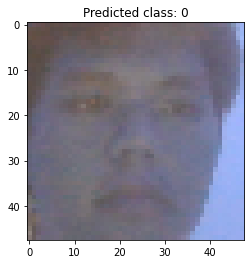

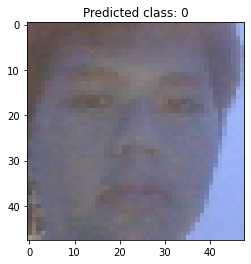

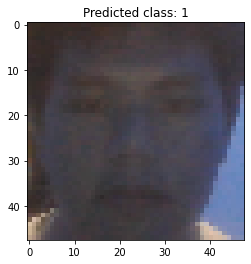

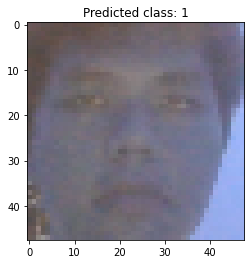

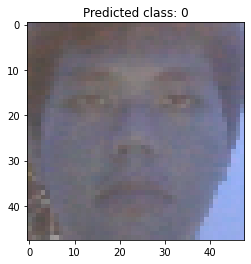

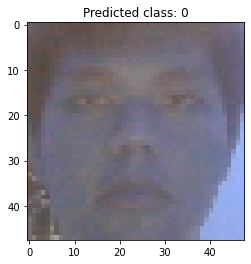

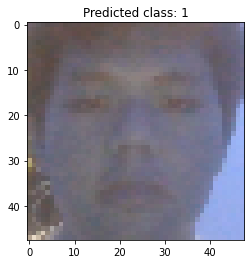

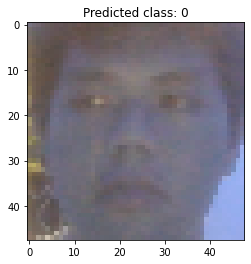

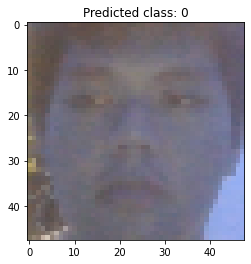

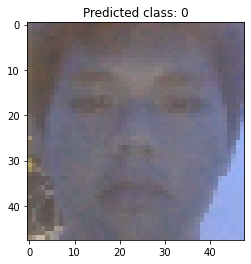

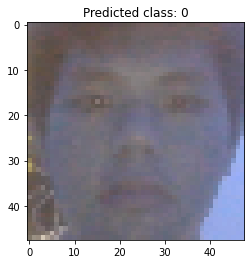

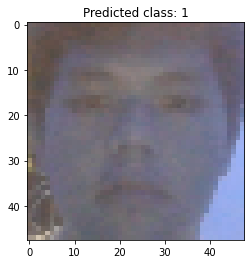

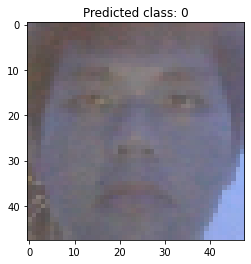

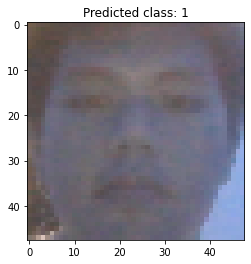

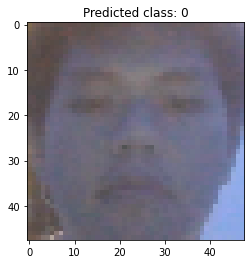

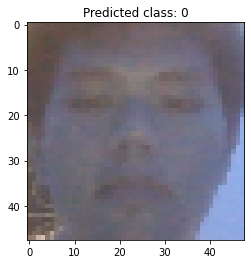

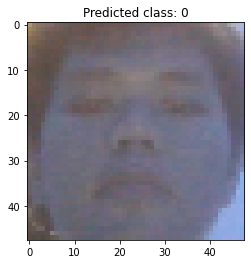

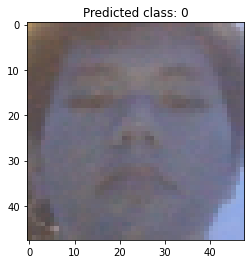

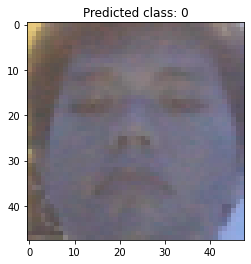

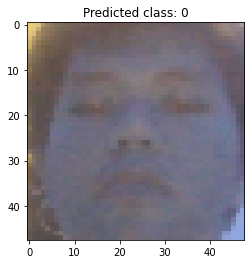

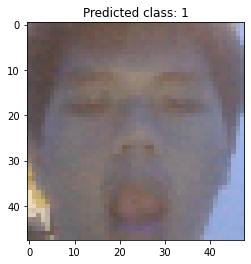

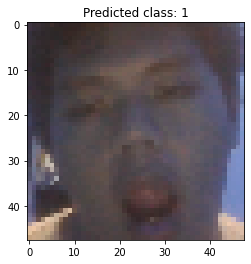

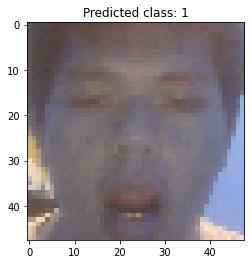

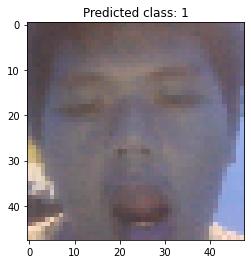

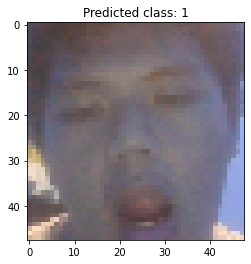

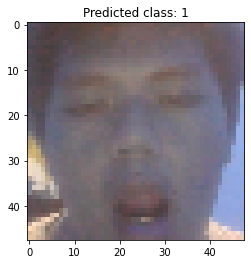

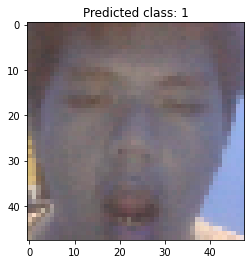

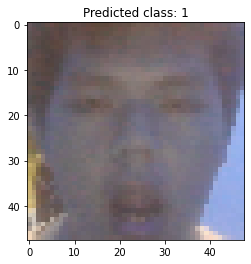

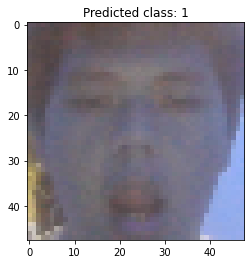

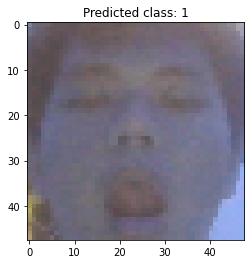

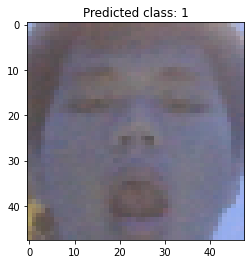

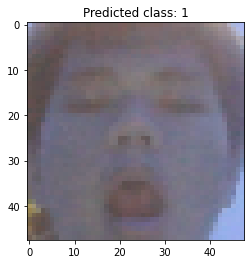

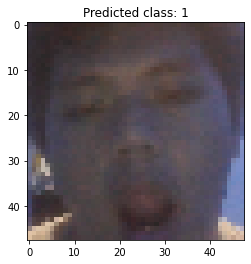

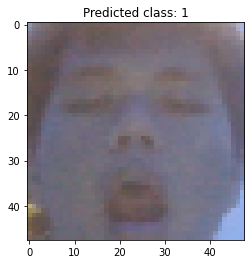

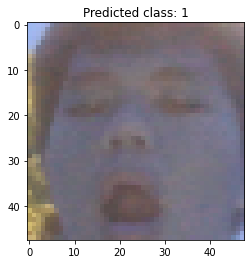

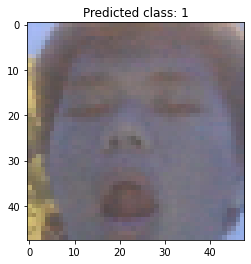

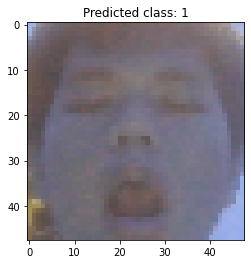

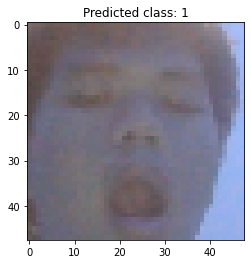

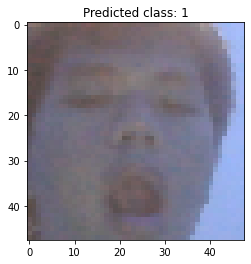

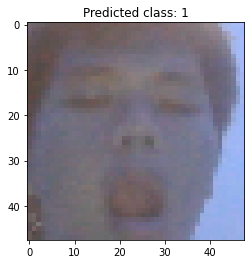

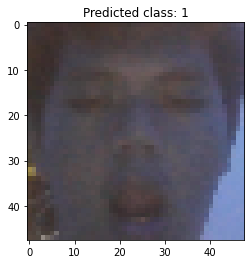

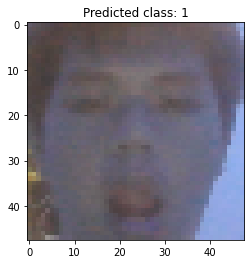

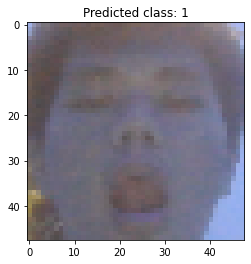

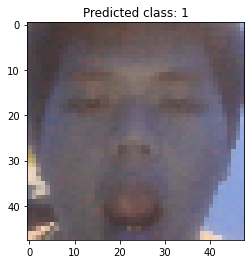

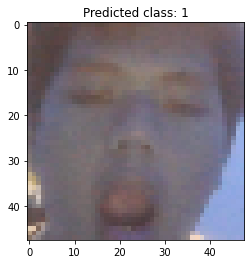

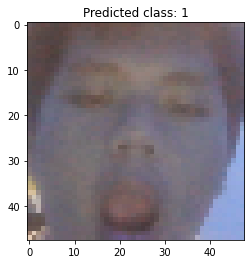

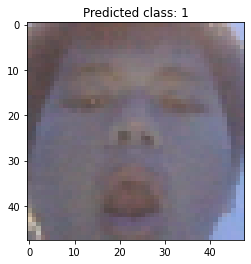

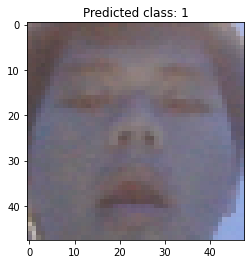

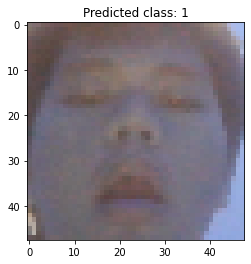

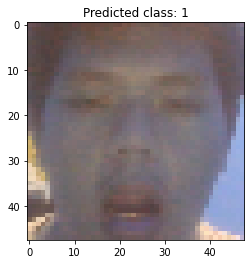

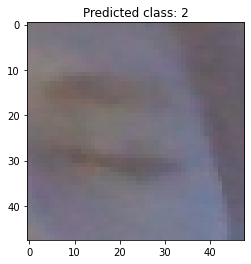

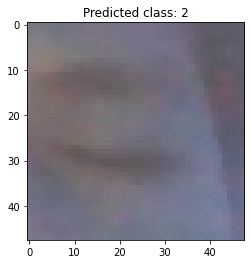

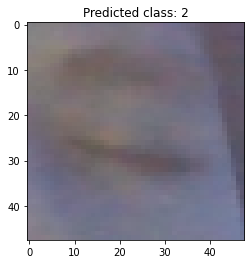

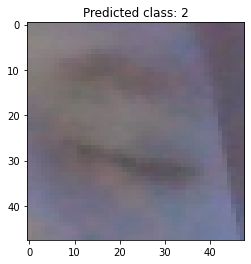

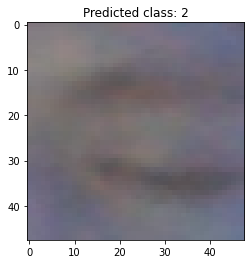

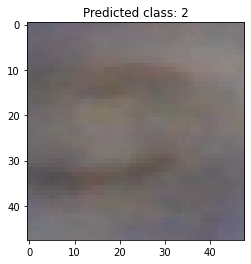

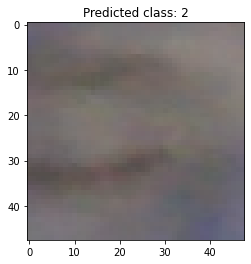

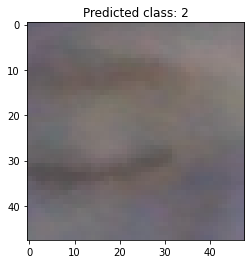

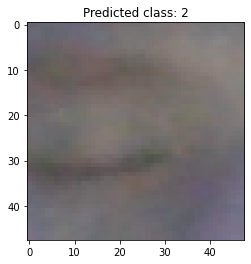

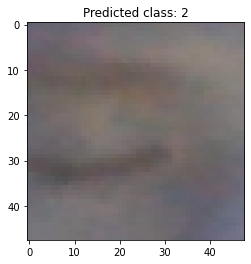

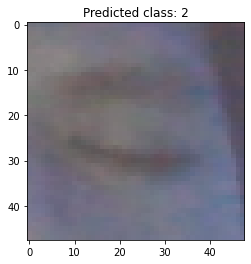

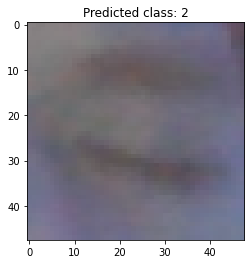

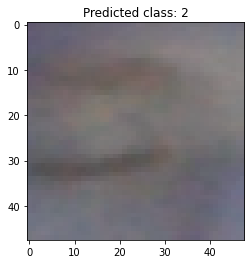

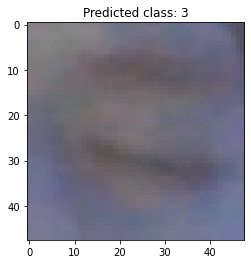

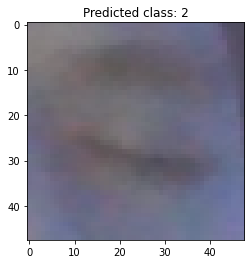

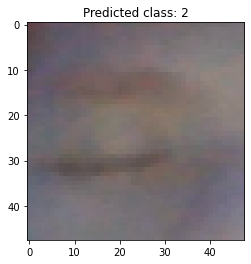

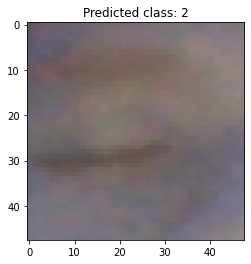

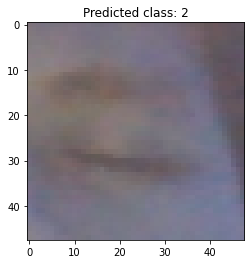

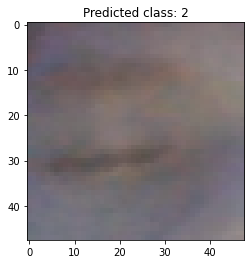

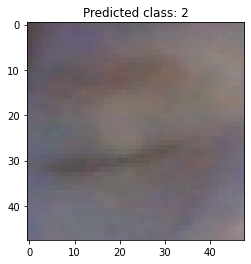

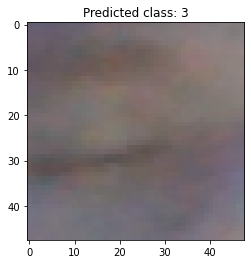

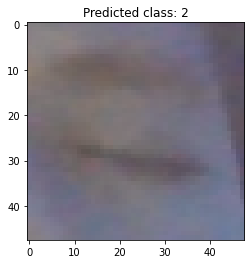

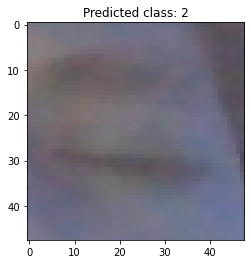

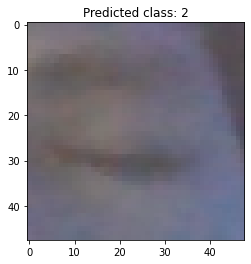

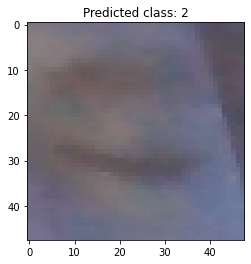

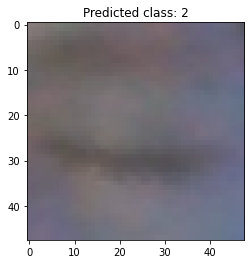

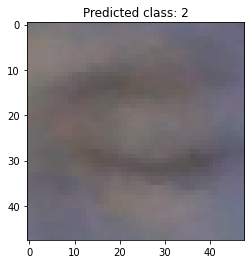

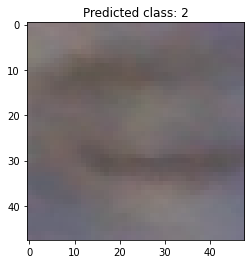

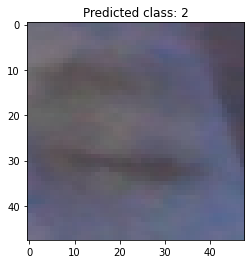

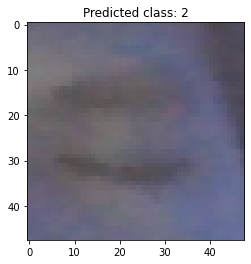

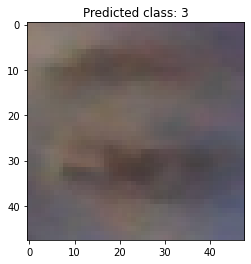

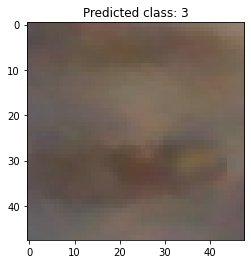

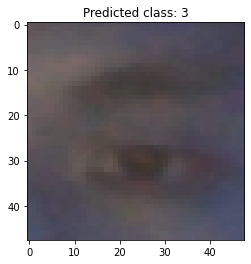

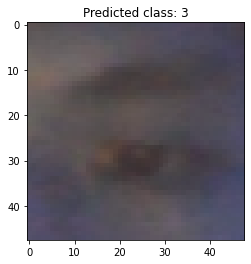

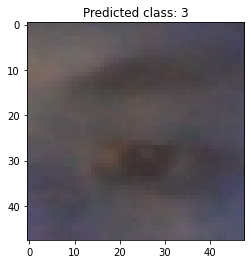

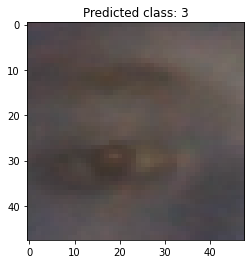

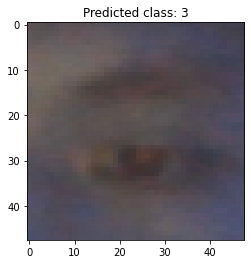

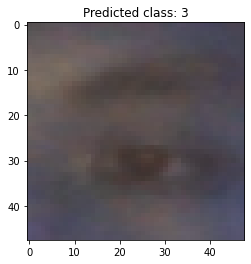

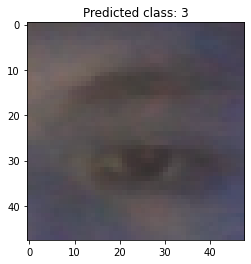

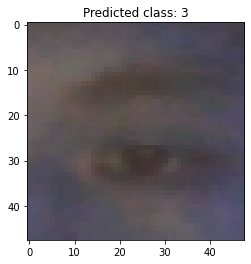

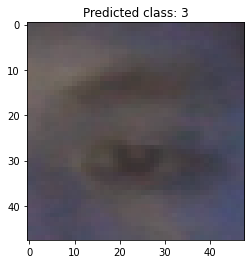

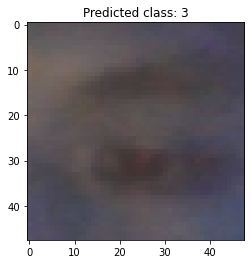

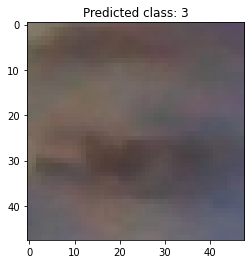

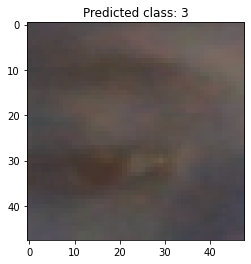

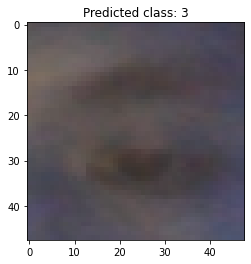

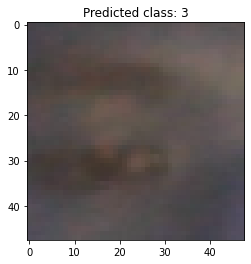

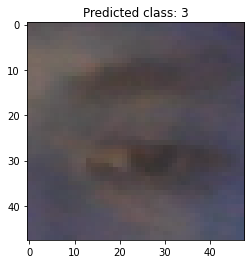

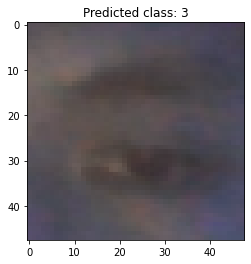

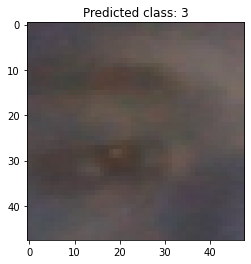

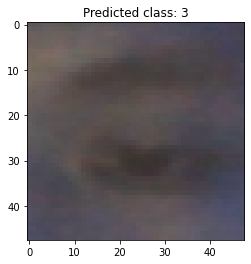

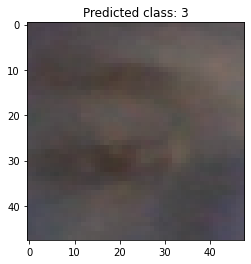

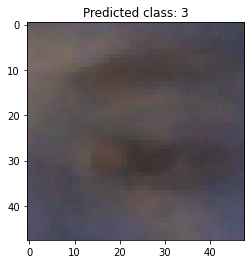

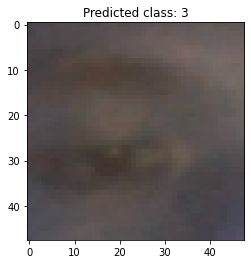

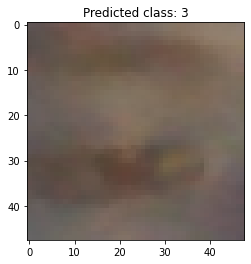

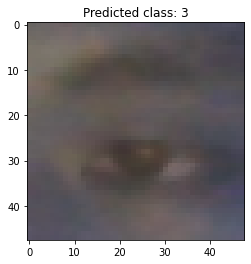

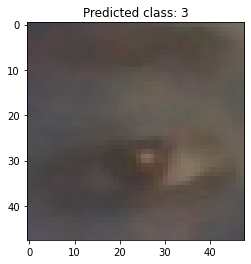

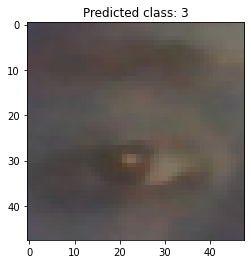

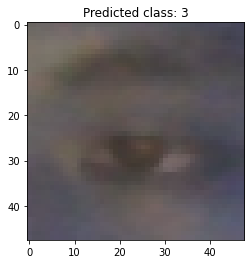

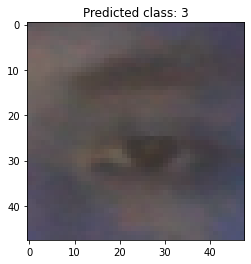

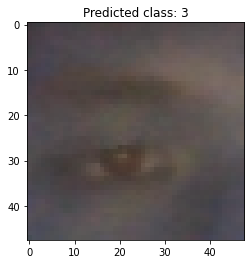

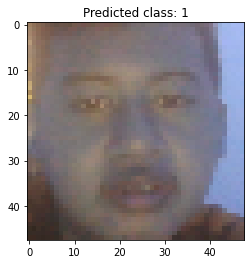

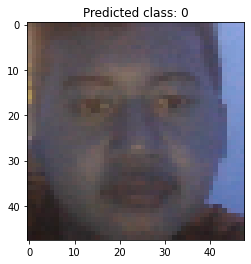

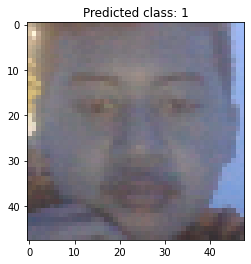

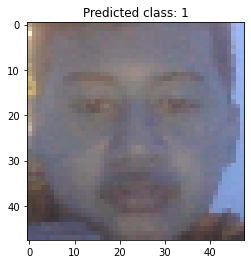

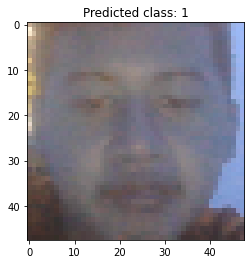

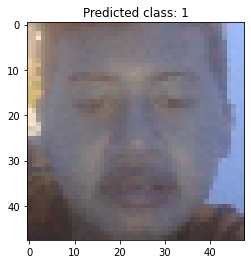

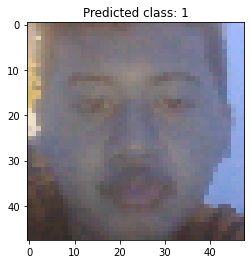

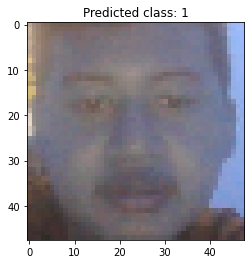

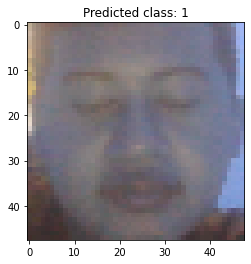

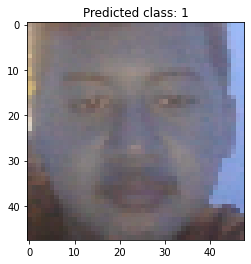

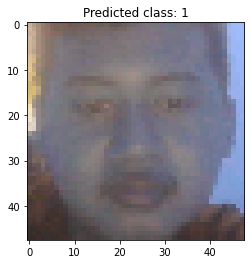

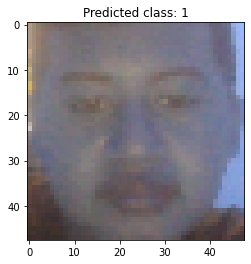

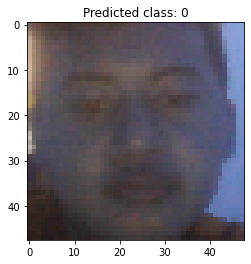

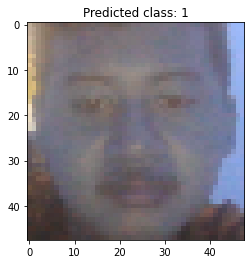

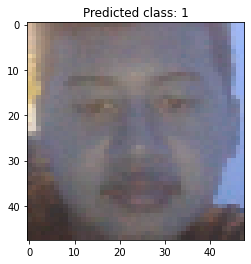

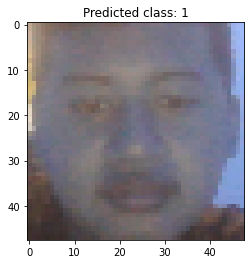

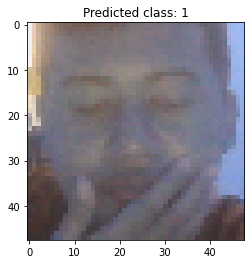

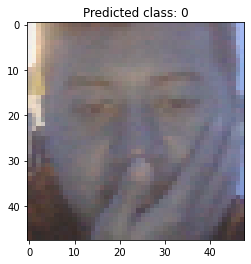

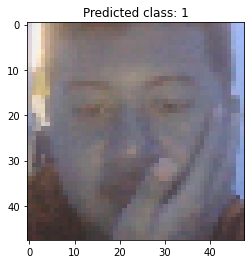

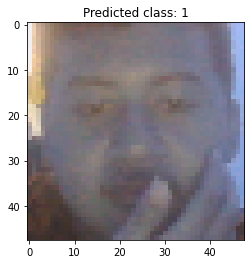

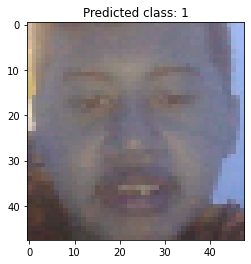

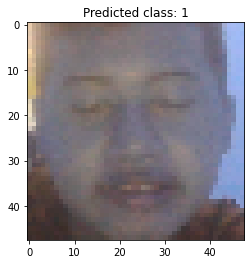

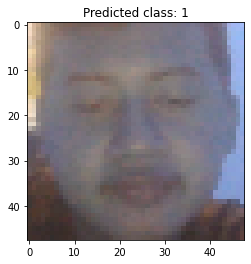

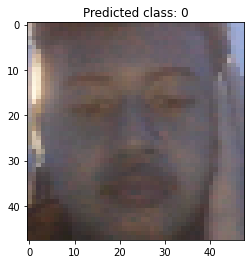

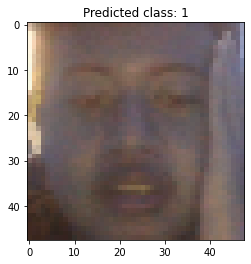

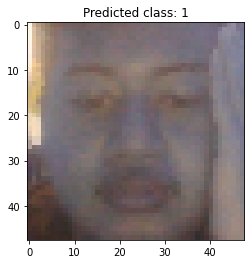

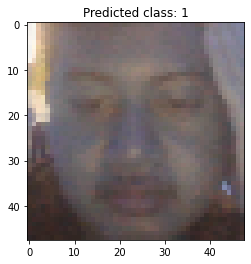

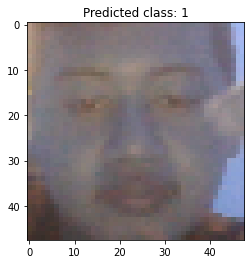

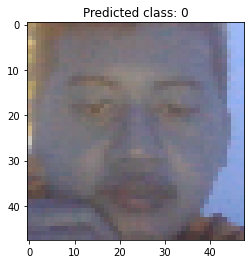

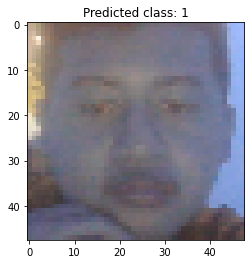

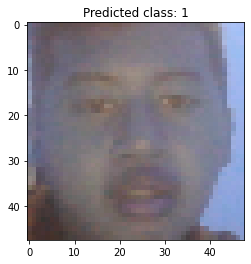

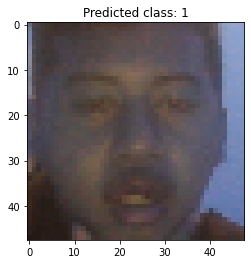

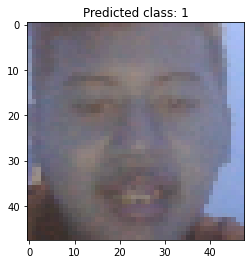

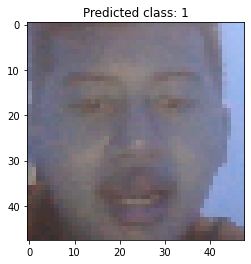

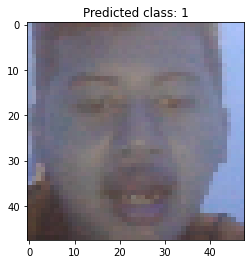

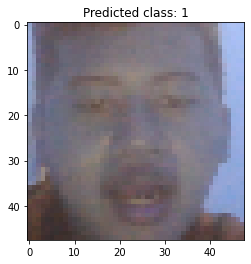

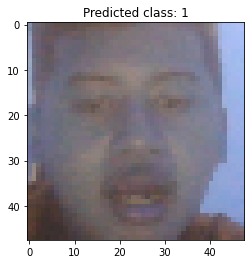

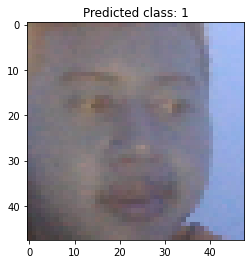

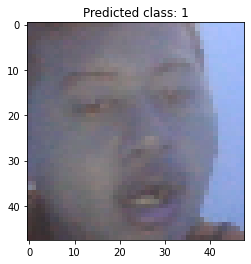

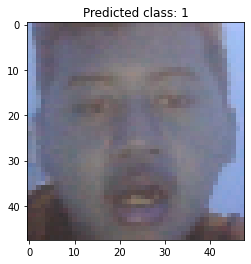

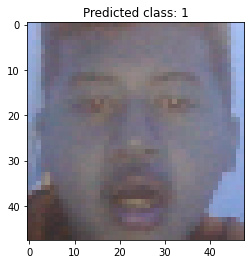

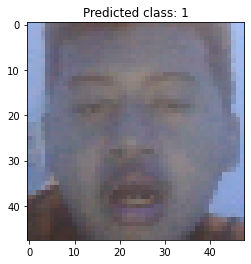

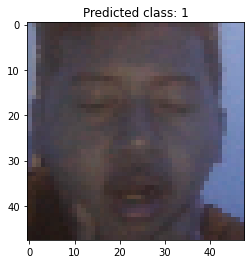

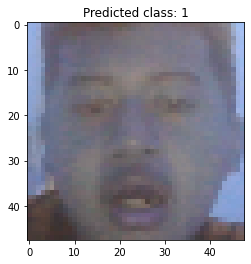

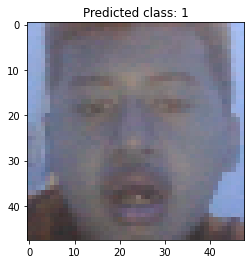

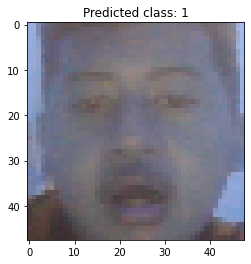

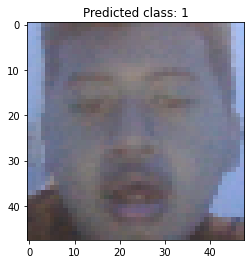

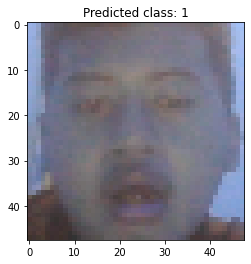

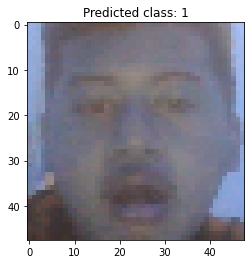

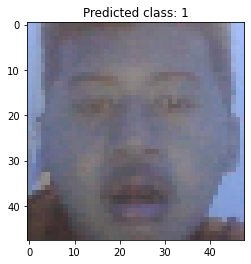

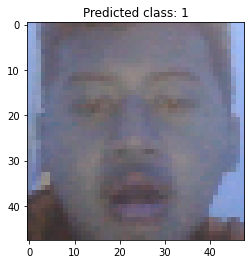

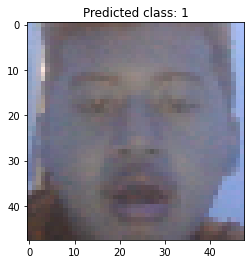

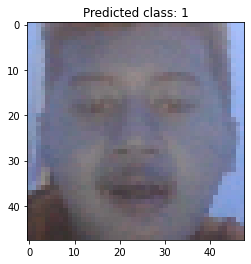

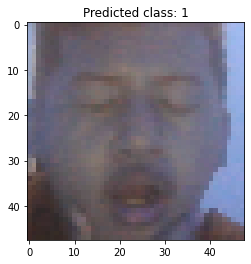

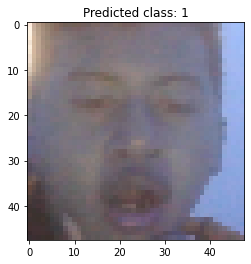

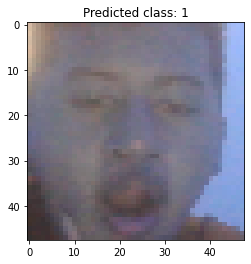

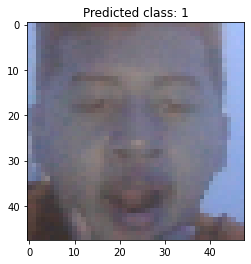

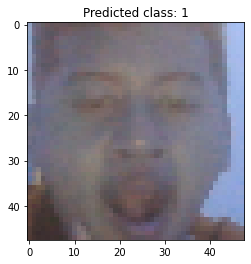

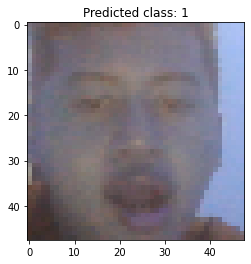

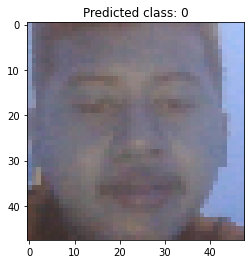

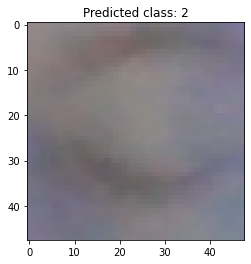

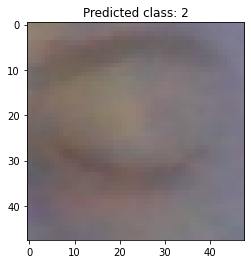

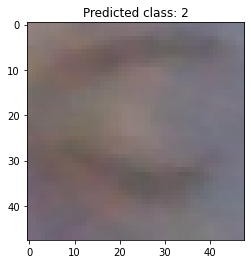

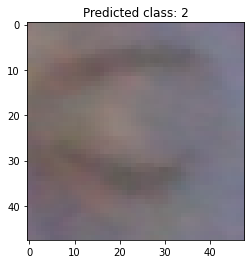

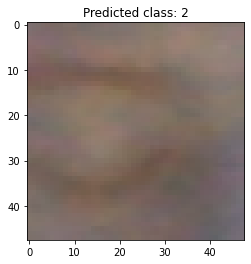

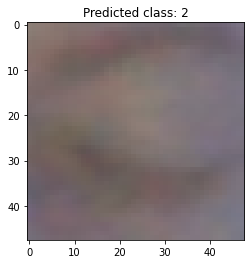

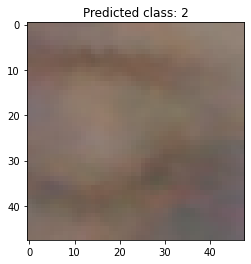

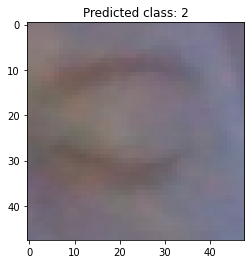

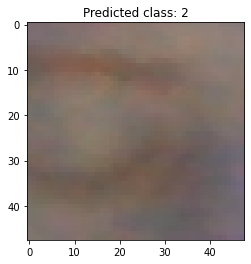

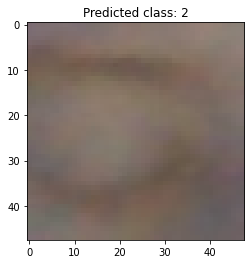

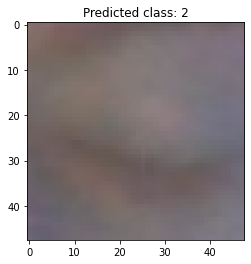

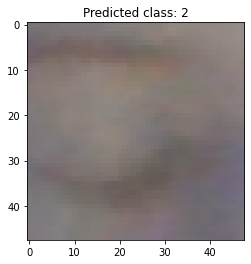

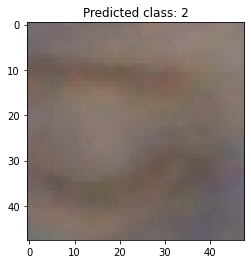

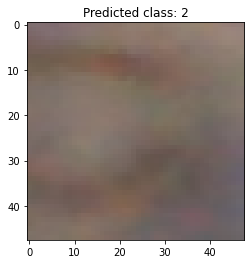

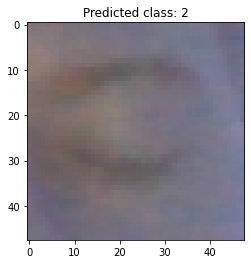

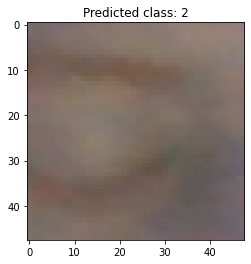

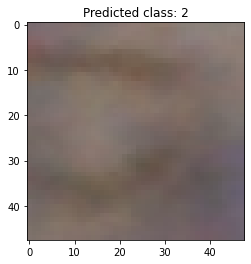

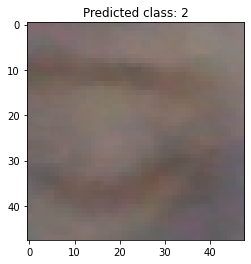

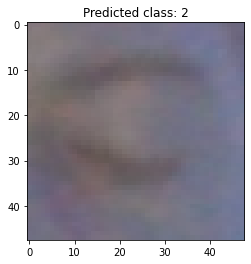

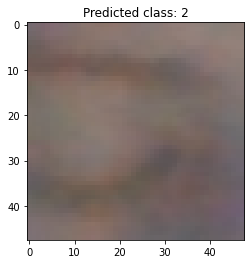

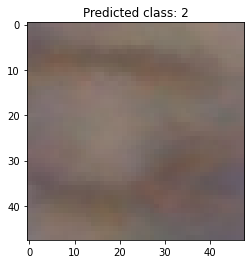

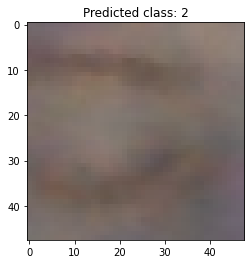

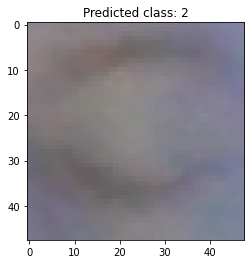

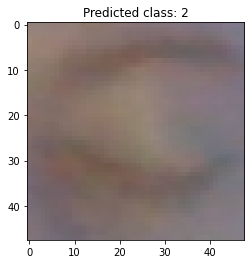

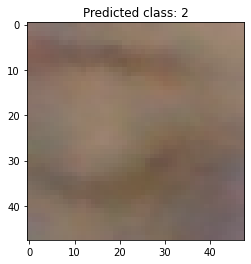

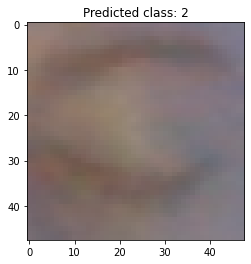

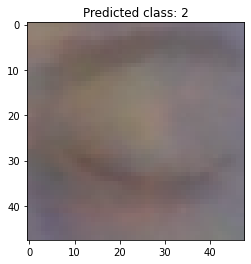

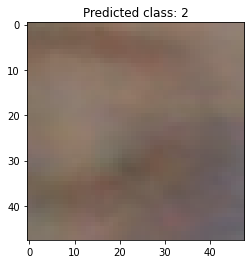

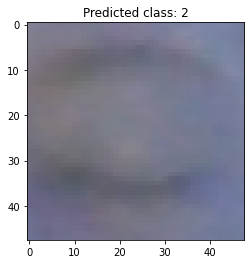

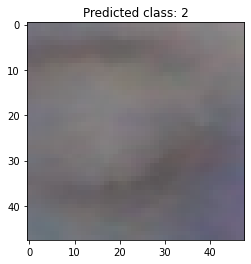

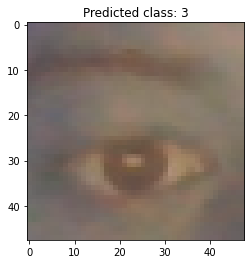

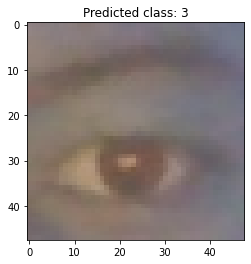

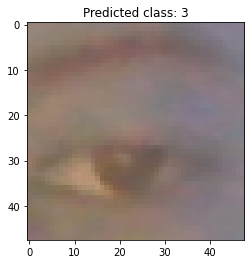

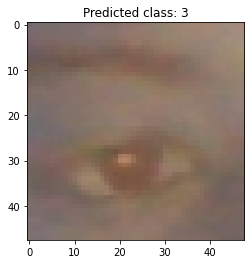

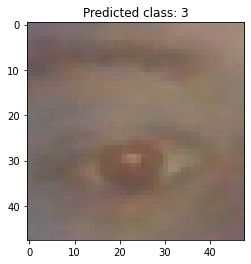

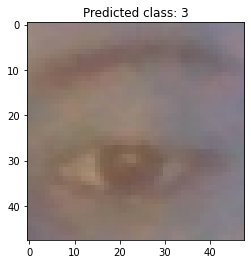

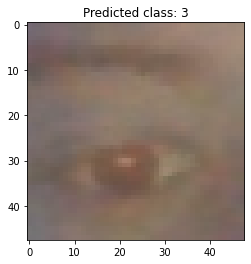

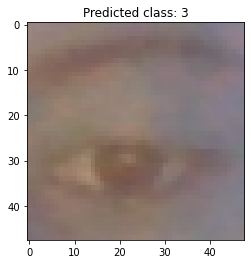

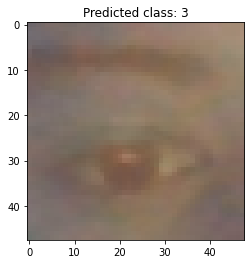

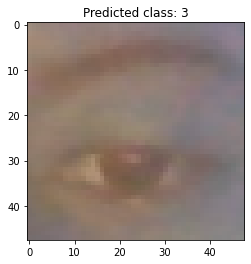

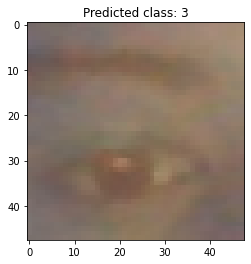

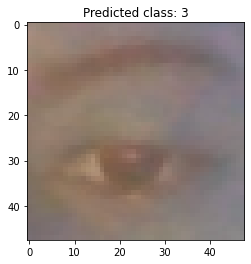

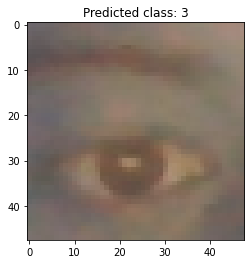

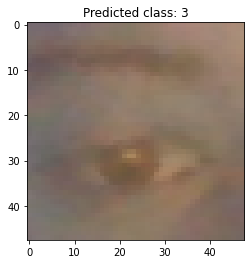

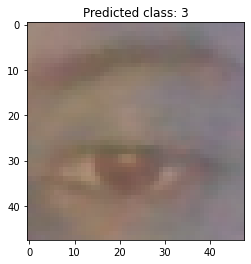

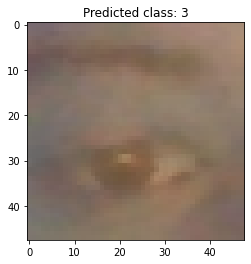

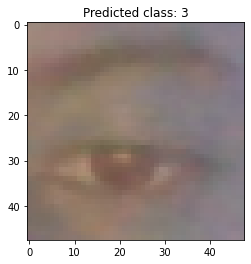

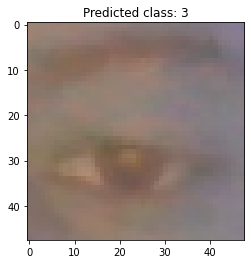

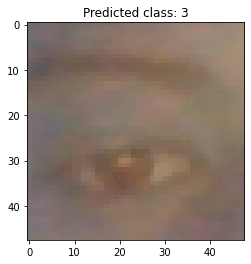

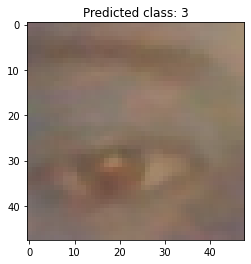

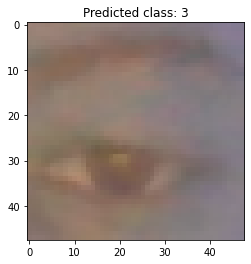

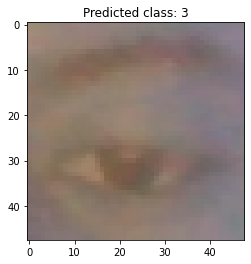

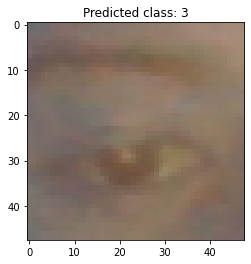

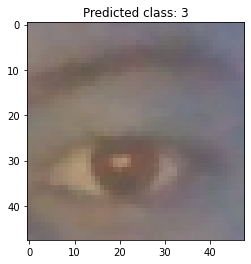

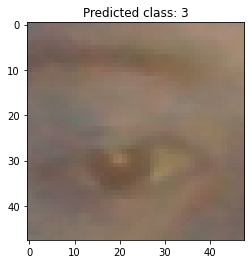

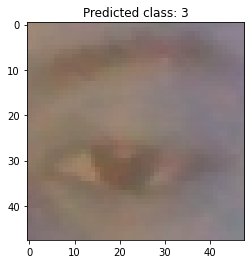

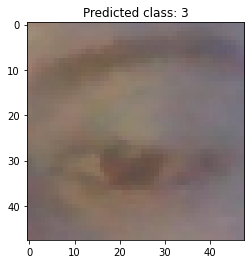

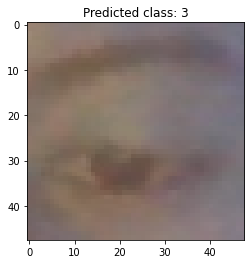

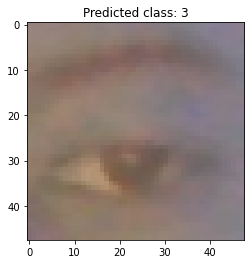

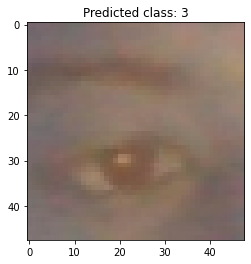

In [52]:
import numpy as np
output_paldi = []
output_zul = []

jumlah_data_paldi = 0
jumlah_data_zul = 0
waktu = 0
for data in x_paldi:
    
    expected_shape = (1, 48, 48, 3)
    resized_x_paldi = np.resize(data, expected_shape).astype(np.float32)

    # Set input tensor ke dalam interpreter
    interpreter.set_tensor(input_details[0]['index'], resized_x_paldi)

    # Jalankan inferensi
    interpreter.invoke()

    # Dapatkan output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    

    # Mengambil label kelas yang memiliki probabilitas tertinggi
    predicted_class_index = np.argmax(output_data)
    output_paldi.append(predicted_class_index)
    
    jumlah_data_paldi += 1
    
    plt.imshow(data)
    plt.title(f"Predicted class: {predicted_class_index}")
    plt.show()
    
for data in x_zul:
    expected_shape = (1, 48, 48, 3)
    resized_x_paldi = np.resize(data, expected_shape).astype(np.float32)

    # Set input tensor ke dalam interpreter
    interpreter.set_tensor(input_details[0]['index'], resized_x_paldi)

    # Jalankan inferensi
    interpreter.invoke()

    # Dapatkan output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    
    

    # Mengambil label kelas yang memiliki probabilitas tertinggi
    predicted_class_index = np.argmax(output_data)
    output_zul.append(predicted_class_index)
    
    jumlah_data_zul += 1
    
    plt.imshow(data)
    plt.title(f"Predicted class: {predicted_class_index}")
    plt.show()

In [61]:
output_lite_paldi = confusion_matrix(y_paldi, output_paldi)
output_lite_zul = confusion_matrix(y_zul, output_zul)

In [62]:
lst_litezul = []
akurasi_litezul = []
presisi_litezul = []
recall_litezul = []
mean_acc_litezul = 0
mean_pres_litezul = 0
mean_recal_litezul = 0

for cls in range(output_lite_zul.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, output_lite_zul)
    lst_litezul.append([TP, FN, FP, TN])
    
for i in range(len(lst_litezul)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_litezul[i][0], lst_litezul[i][1], lst_litezul[i][2], lst_litezul[i][3])
    akurasi_litezul.append(akurasi)
    presisi_litezul.append(np.nan_to_num(presisi, nan=0))
    recall_litezul.append(recall)
    mean_pres_litezul += akurasi
    mean_pres_litezul += np.nan_to_num(presisi, nan=0)
    mean_recal_litezul += recall
    print(f'Akurasi: {akurasi:.4f}, Presisi: {np.nan_to_num(presisi, nan=0):.4f}, Recall: {recall:.4f}')
    print()

Hasil dari setiap class 0
Akurasi: 78.3333, Presisi: 83.3333, Recall: 16.6667

Hasil dari setiap class 1
Akurasi: 78.3333, Presisi: 53.7037, Recall: 96.6667

Hasil dari setiap class 2
Akurasi: 100.0000, Presisi: 100.0000, Recall: 100.0000

Hasil dari setiap class 3
Akurasi: 100.0000, Presisi: 100.0000, Recall: 100.0000



In [63]:
lst_litepaldi = []
akurasi_litepaldi = []
presisi_litepaldi = []
recall_litepaldi = []
mean_acc_litepaldi = 0
mean_pres_litepaldi = 0
mean_recal_litepaldi = 0

for cls in range(output_lite_zul.shape[0]):
    TP, FN, FP, TN = confusion_matrix_for(cls, output_lite_paldi)
    lst_litepaldi.append([TP, FN, FP, TN])
    
for i in range(len(lst_litezul)):
    print(f'Hasil dari setiap class {i}')
    akurasi, presisi, recall = confusion_matrix_score(lst_litepaldi[i][0], lst_litepaldi[i][1], lst_litepaldi[i][2], lst_litepaldi[i][3])
    akurasi_litepaldi.append(akurasi)
    presisi_litepaldi.append(np.nan_to_num(presisi, nan=0))
    recall_litepaldi.append(recall)
    mean_pres_litepaldi += akurasi
    mean_pres_litepaldi += np.nan_to_num(presisi, nan=0)
    mean_recal_litepaldi += recall
    print(f'Akurasi: {akurasi:.4f}, Presisi: {np.nan_to_num(presisi, nan=0):.4f}, Recall: {recall:.4f}')
    print()

Hasil dari setiap class 0
Akurasi: 95.0000, Presisi: 100.0000, Recall: 80.0000

Hasil dari setiap class 1
Akurasi: 95.0000, Presisi: 83.3333, Recall: 100.0000

Hasil dari setiap class 2
Akurasi: 98.3333, Presisi: 100.0000, Recall: 93.3333

Hasil dari setiap class 3
Akurasi: 98.3333, Presisi: 93.7500, Recall: 100.0000



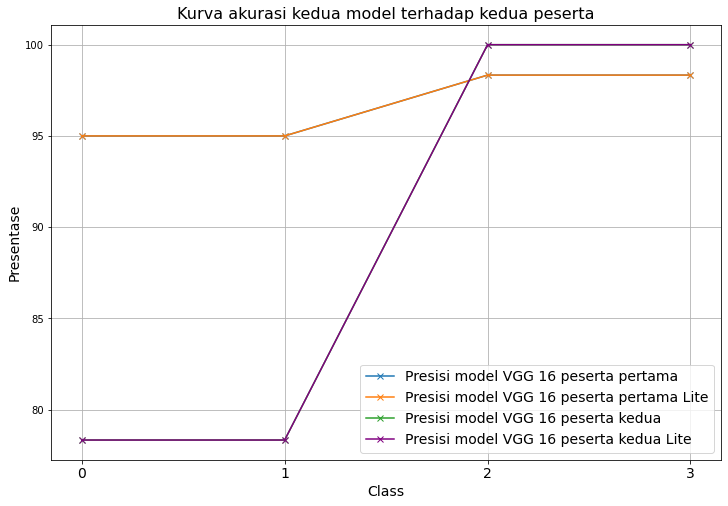

In [64]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(4), akurasi_vgg50, label='Presisi model VGG 16 peserta pertama', linestyle='-', marker='x')
plt.plot(np.arange(4), akurasi_litepaldi, label='Presisi model VGG 16 peserta pertama Lite', linestyle='-', marker='x')
plt.plot(np.arange(4), akurasi_vgg50zul, label="Presisi model VGG 16 peserta kedua", linestyle='-', marker='x')
plt.plot(np.arange(4), akurasi_litezul, label="Presisi model VGG 16 peserta kedua Lite", color='purple', linestyle='-', marker='x')
plt.xticks(np.arange(4), fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Presentase', fontsize=14)
plt.title('Kurva akurasi kedua model terhadap kedua peserta', fontsize=16)
plt.legend(prop={'size': 14}, loc='best')
plt.grid(True)
plt.show()

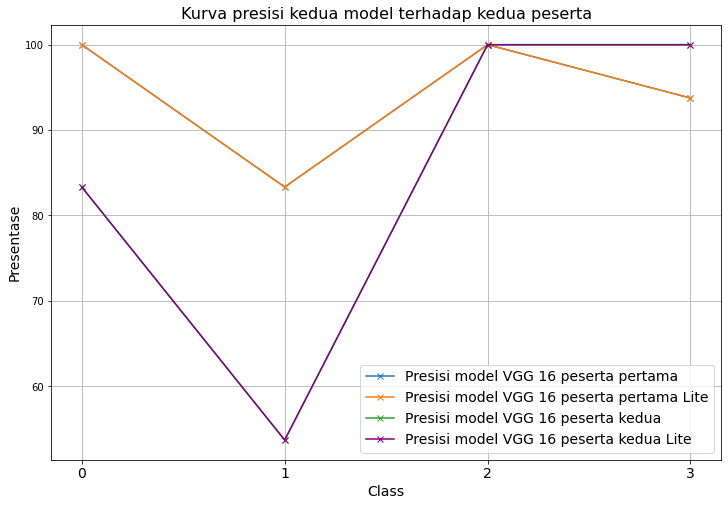

In [65]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(4), presisi_vgg50, label='Presisi model VGG 16 peserta pertama', linestyle='-', marker='x')
plt.plot(np.arange(4), presisi_litepaldi, label='Presisi model VGG 16 peserta pertama Lite', linestyle='-', marker='x')
plt.plot(np.arange(4), presisi_vgg50zul, label="Presisi model VGG 16 peserta kedua", linestyle='-', marker='x')
plt.plot(np.arange(4), presisi_litezul, label="Presisi model VGG 16 peserta kedua Lite", color='purple', linestyle='-', marker='x')
plt.xticks(np.arange(4), fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Presentase', fontsize=14)
plt.title('Kurva presisi kedua model terhadap kedua peserta', fontsize=16)
plt.legend(prop={'size': 14}, loc='best')
plt.grid(True)
plt.show()

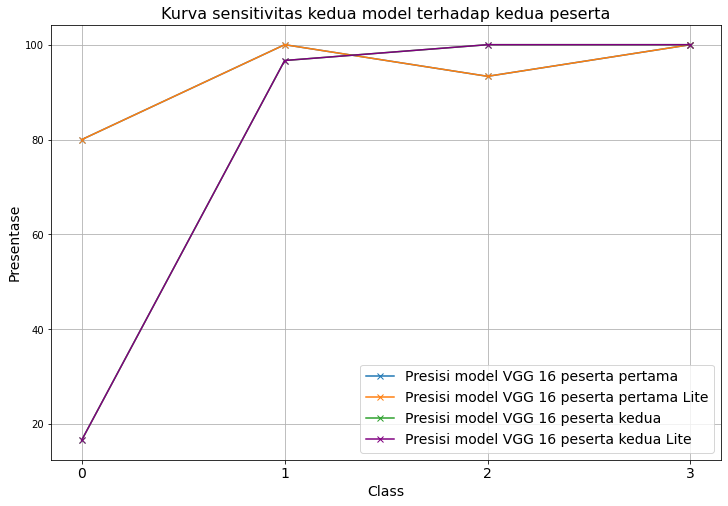

In [66]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(4), recall_vgg50, label='Presisi model VGG 16 peserta pertama', linestyle='-', marker='x')
plt.plot(np.arange(4), recall_litepaldi, label='Presisi model VGG 16 peserta pertama Lite', linestyle='-', marker='x')
plt.plot(np.arange(4), recall_vgg50zul, label="Presisi model VGG 16 peserta kedua", linestyle='-', marker='x')
plt.plot(np.arange(4), recall_litezul, label="Presisi model VGG 16 peserta kedua Lite", color='purple', linestyle='-', marker='x')
plt.xticks(np.arange(4), fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Presentase', fontsize=14)
plt.title('Kurva sensitivitas kedua model terhadap kedua peserta', fontsize=16)
plt.legend(prop={'size': 14}, loc='best')
plt.grid(True)
plt.show()

In [71]:
import time

# Loop melalui data uji dan hitung waktu inferensi untuk setiap sampel
total_time = 0
for sample in x_paldi:
    start_time = time.time()
    sample = np.expand_dims(sample, axis=0)
    # Lakukan pre-processing jika diperlukan

    # Inferensi dengan model
    predictions = model_lenet_50.predict(sample)

    end_time = time.time()
    inference_time = end_time - start_time
    total_time += inference_time

    # Lakukan evaluasi hasil prediksi jika diperlukan

# Hitung rata-rata waktu inferensi per sampel
average_inference_time_vgg50 = total_time / len(x_paldi)
average_inference_timesec_vgg50 = average_inference_time_vgg50 / 1000



1/1 [==============================] - 0s 20ms/step


In [72]:
print("Rata-rata waktu inferensi per sampel:",  average_inference_time_vgg50)

Rata-rata waktu inferensi per sampel: 0.05145114262898763


In [73]:
import numpy as np
output_paldi = []
output_zul = []

jumlah_data_paldi = 0
jumlah_data_zul = 0
waktu = 0
for data in x_paldi:
    start_time = time.time()
    expected_shape = (1, 48, 48, 3)
    resized_x_paldi = np.resize(data, expected_shape).astype(np.float32)

    # Set input tensor ke dalam interpreter
    interpreter.set_tensor(input_details[0]['index'], resized_x_paldi)

    # Jalankan inferensi
    interpreter.invoke()

    # Dapatkan output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    

    # Mengambil label kelas yang memiliki probabilitas tertinggi
    predicted_class_index = np.argmax(output_data)
    end_time = time.time()
    inference_time = end_time - start_time
    waktu += inference_time
    
    output_paldi.append(predicted_class_index)
    
    jumlah_data_paldi += 1
    
    plt.imshow(data)
    plt.title(f"Predicted class: {predicted_class_index}")
    plt.show()

average_inference_time = waktu / len(x_paldi)
average_inferencesec_time = average_inference_time / 1000
print("Rata-rata waktu inferensi per sampel:", average_inference_time)

Rata-rata waktu inferensi per sampel: 0.005834041039148966


In [74]:
perbedaan_waktu = average_inference_time_vgg50 - average_inference_time
print(perbedaan_waktu)

0.045617101589838664
